In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

Reading the data

In [2]:
df = pd.read_excel('https://goz39a.s3.eu-central-1.amazonaws.com/bitcoin.xlsx',index_col='Date',engine='openpyxl')
df.sort_index(ascending=True,inplace=True)

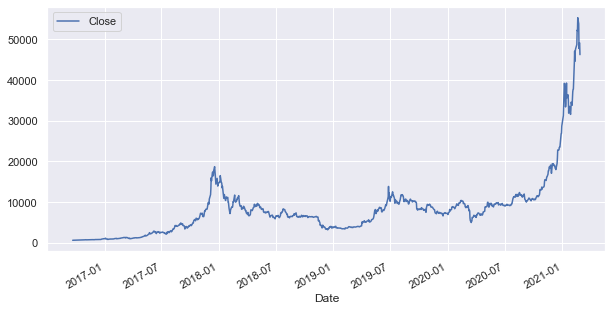

In [3]:
df.plot(figsize=(10,5));

Calculate the log returns

In [4]:
df.head()

,Close
Date,
2016-09-21,593.67
2016-09-22,595.75
2016-09-23,599.50
2016-09-26,605.02
2016-09-27,603.20


In [5]:
df['Ret']= df['Close'].pct_change(periods=1)
df['Ret'] = df['Ret'].apply(lambda x : np.log(1+x))
df.dropna(inplace=True,how='any')

$ln(1+r)=logret$

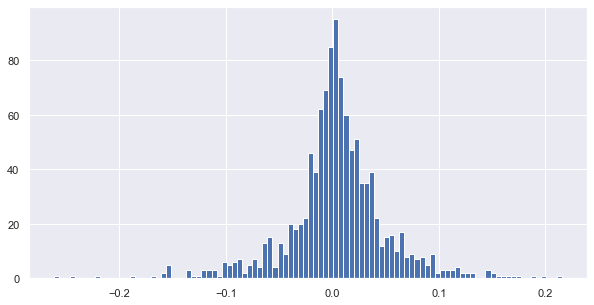

In [6]:
df['Ret'].hist(bins=100,figsize=(10,5));

Calculate the Volatility

In [7]:
print('Volatility of Bitcoin =',np.round(df['Ret'].std()*np.sqrt(250)*100,4), '%')

Volatility of Bitcoin = 76.4254 %


<b>Gaussian Mixture</b> <br>
Studying the bitcoin returns as the combination of <b>three</b> gaussians. Each gaussian represents a regime

In [8]:
from sklearn import mixture

In [9]:
data = df['Ret'].values

In [10]:
clf = mixture.GaussianMixture(n_components=3)
clf.fit(data.reshape(-1,1))

GaussianMixture(n_components=3)

In [11]:
for i in np.arange(0,3):
    print('Regime',i)
    print('Prob',np.round(clf.weights_[i]*100,2),'%')
    print('Avg Return:',np.round(clf.means_[i]*100,2)[0],'%')
    print('Volatility:',np.round(np.sqrt(250)*100*np.sqrt(clf.covariances_[i][0,0]),2),'%')
    print('\n')

Regime 0
Prob 18.11 %
Avg Return: 5.82 %
Volatility: 77.7 %


Regime 1
Prob 13.09 %
Avg Return: -6.74 %
Volatility: 84.89 %


Regime 2
Prob 68.81 %
Avg Return: 0.32 %
Volatility: 34.11 %




Graphical Representation

In [12]:
from scipy.stats import norm

In [13]:
avg_ret = clf.means_.ravel()
stdev = clf.covariances_.ravel()

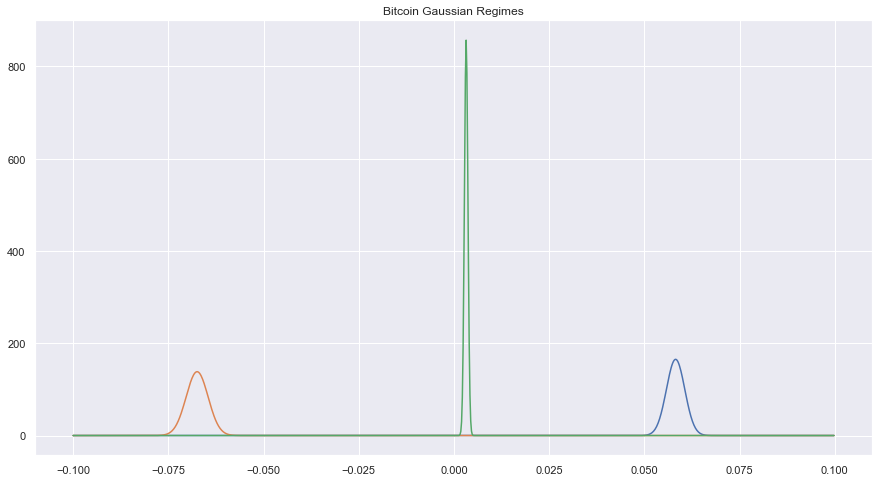

In [14]:
fig , ax = plt.subplots(1,1,figsize=(15,8))

x = np.arange(-0.1,0.1,0.0002)
ax.set_title('Bitcoin Gaussian Regimes')
for avg, std in zip(avg_ret,stdev):
    ax.plot(x, norm.pdf(x,loc=avg,scale=std))